In [13]:
import numpy as np
import matplotlib.pyplot as plt
from implicit_euler import implicit_euler
from explicit_euler import explicit_euler
from leapfrog import leapfrog
from trapezoidal import trapezoidal

In [14]:
f = lambda x: -x

k = .003
t_final = 10
t = np.linspace(0,10,int(np.ceil(t_final/k)))
y = np.empty(t.shape,dtype=float)
y[0] = 100

y_implicit = implicit_euler(f,y,k,tol=1e-3)

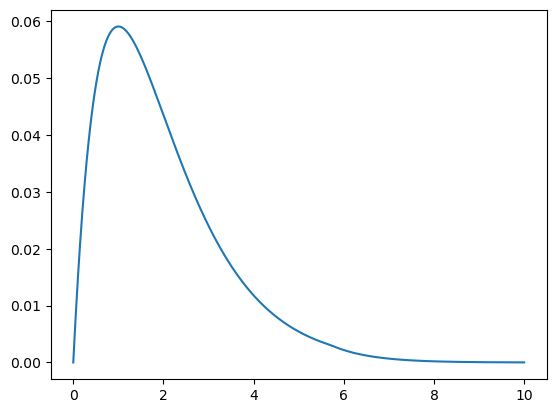

In [15]:
plt.plot(t,y_implicit-100*np.exp(-t))

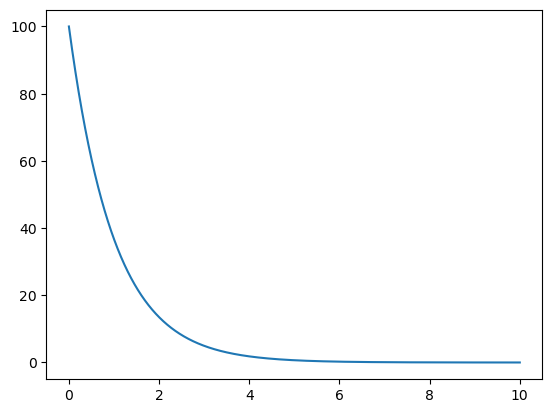

In [16]:
f = lambda x: -x

k = .003
t_final = 10
t = np.linspace(0,10,int(np.ceil(t_final/k)))
y = np.empty(t.shape,dtype=float)
y[0] = 100

y_explicit = explicit_euler(f,y,k)
plt.plot(t,y_explicit)

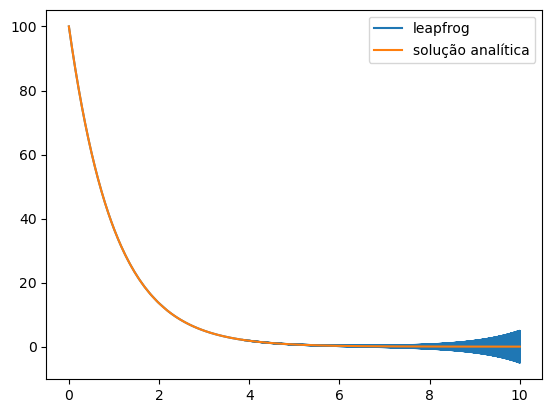

In [17]:
f = lambda x: -x

k = .003
t_final = 10
t = np.linspace(0,10,int(np.ceil(t_final/k)))
y = np.empty(t.shape,dtype=float)
y[0] = 100

y_leapfrog = leapfrog(f,y,k)
plt.plot(t,y_leapfrog,label='leapfrog')
plt.plot(t,100*np.exp(-t),label='solução analítica')
plt.legend()

In [ ]:
f = lambda t, y: -t*y
F = [f]
k = 0.003
t_final = 10
t = np.linspace(0, t_final, int(np.ceil(t_final / k)))
y = np.empty_like(t)
y[0] = 100
# def trapezoidal(F, y0: np.ndarray,pontos:int, t: np.ndarray, k: float, tol: float):
y_trapezoidal = trapezoidal(F, np.array([100]), 1000,t, k=k, tol=1e-3)
plt.plot(t, y_trapezoidal)
plt.grid()
plt.title("Solução da EDO usando método trapezoidal")
plt.show()

TypeError: trapezoidal() missing 1 required positional argument: 't'

$$\frac{dy}{dt} = -y$$

$$\frac{dy}{y} = -dt$$

$$\int \frac{dy}{y} = -\int dt$$

$$\ln(y) = -t + C$$

$$y(t) = Ce^{-t}$$
$$ y(0) = 100$$

$$y(t) = 100e^{-t}$$

Agora, temos que obter as regiões de estabilidade absoluta. Para fazer isso, precisamos plotar o gráfico no plano complexo. Logo, $$z = |r|e^{i\theta}$$

onde $z$ é um número complexo, $\theta$ é um ângulo com sentido anti-horário no plano complexo.

O raio é dado pela seguinte relação para determinar a estabilidade absoluta do método

$$|r| = \left|\frac{y^{n+1}}{y^n}\right| \leq 1$$

Logo, $z$ será dado por: $$z = \left|\frac{y^{n+1}}{y^n}\right|e^{i\theta}$$

A maneira correta é fazer analítico, mas fiquei com preguiça

Começando pelo método explicito de Euler

In [ ]:
theta = np.linspace(0,2*np.pi,1000)
z_explicit = np.abs(y_explicit[1]/y_explicit[0])*np.exp(theta*1j)

Text(0.5, 1.0, 'Região de estabilidade método de euler explicito')

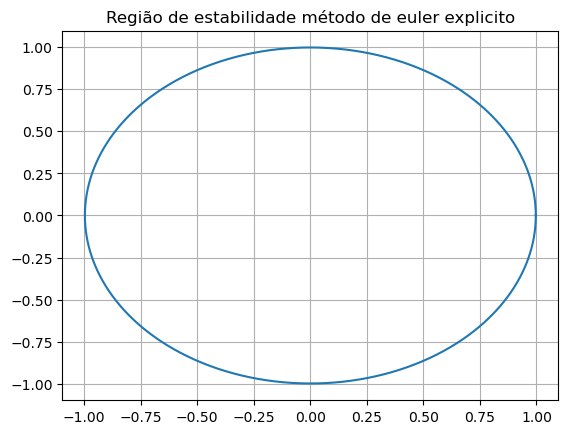

In [ ]:
plt.plot(z_explicit.real,z_explicit.imag)
plt.grid()
plt.title("Região de estabilidade método de euler explicito")

Agora fazendo com o método implicito

Text(0.5, 1.0, 'Região de estabilidade método de euler implicito')

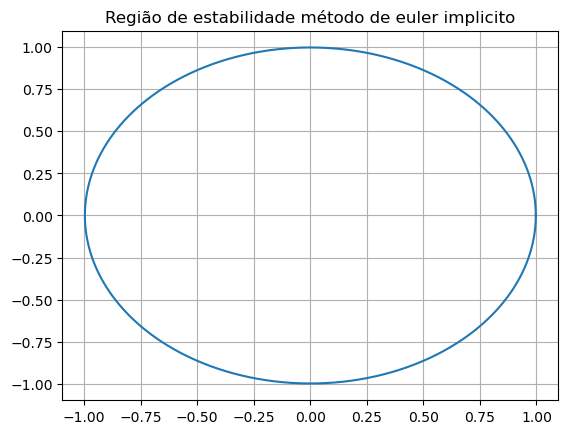

In [ ]:
theta = np.linspace(0,2*np.pi,1000)
z_implicit = np.abs(y_implicit[1]/y_implicit[0])*np.exp(theta*1j)

plt.plot(z_implicit.real,z_implicit.imag)
plt.grid()
plt.title("Região de estabilidade método de euler implicito")

# Leapfrog

Text(0.5, 1.0, 'Região de estabilidade método leapfrog')

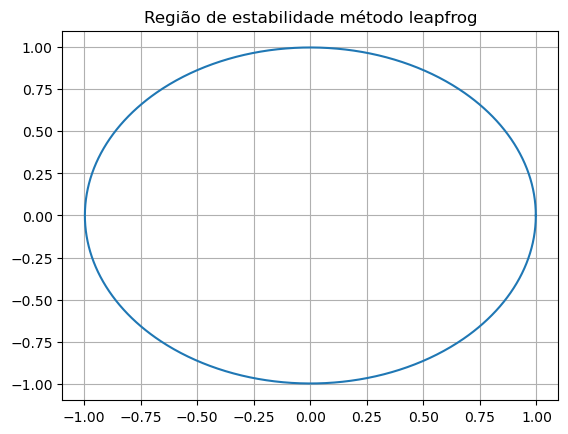

In [ ]:
theta = np.linspace(0,2*np.pi,1000)
z_leapfrog = np.abs(y_leapfrog[2]/y_leapfrog[1])*np.exp(theta*1j)

plt.plot(z_leapfrog.real,z_leapfrog.imag)
plt.grid()
plt.title("Região de estabilidade método leapfrog")

# Trapezoidal

Text(0.5, 1.0, 'Região de estabilidade método trapezoidal')

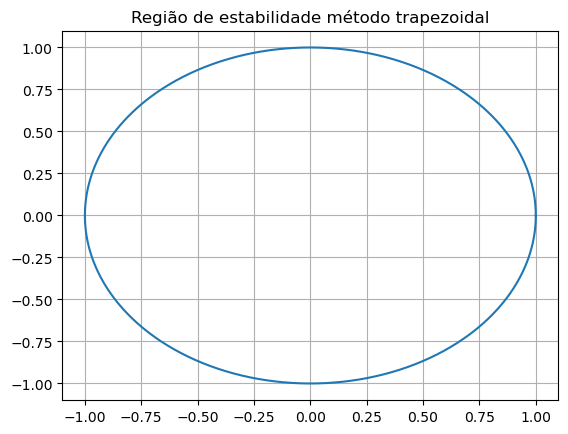

In [ ]:
theta = np.linspace(0,2*np.pi,1000)
z_trapezoidal = np.abs(y_trapezoidal[2]/y_trapezoidal[1])*np.exp(theta*1j)

plt.plot(z_trapezoidal.real,z_trapezoidal.imag)
plt.grid()
plt.title("Região de estabilidade método trapezoidal")

# Resolução da questão 12.4

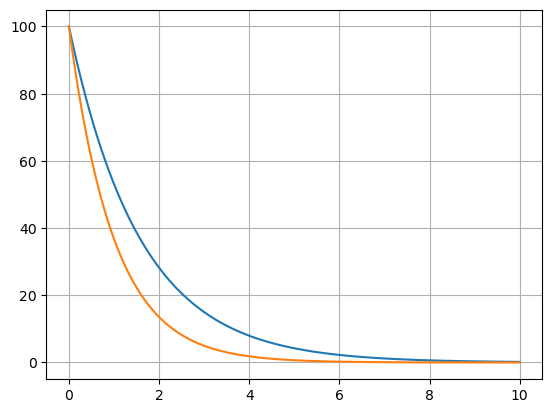

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from merson_method import merson

f = lambda t,x: -x

k = .005
t_final = 10
t = np.linspace(0,10,int(np.ceil(t_final/k)))
y = np.empty(t.shape,dtype=float)
y[0] = 100

y_merson = merson(y,f,k)

plt.plot(t,y)
plt.plot(t,100*np.exp(-t))
plt.grid()

refazer amanhã o merson usando matriz mesmo hahaha

a curva de estabilidade vai ser dada por $$r = 1 + \lambda k \mathbf b^T(\mathbf I - \lambda k\mathbf A)^{-1}\mathbf E$$

In [ ]:
b = np.array([[1/6,0,0,2/3,1/6]])

A = np.array([[0,0,0,0,0],
              [1/3,0,0,0,0],
              [1/6,1/6,0,0,0],
              [1/8,0,3/8,0,0],
              [1/2,0,-3/2,2,0]
              ])

r = lambda x: np.abs(1 + x*b@np.linalg.inv(np.identity((5),dtype=float)-x*A)@np.ones((5,1),dtype=float))
r_vec = np.vectorize(lambda x: r(x).item())

Text(0, 0.5, 'Im')

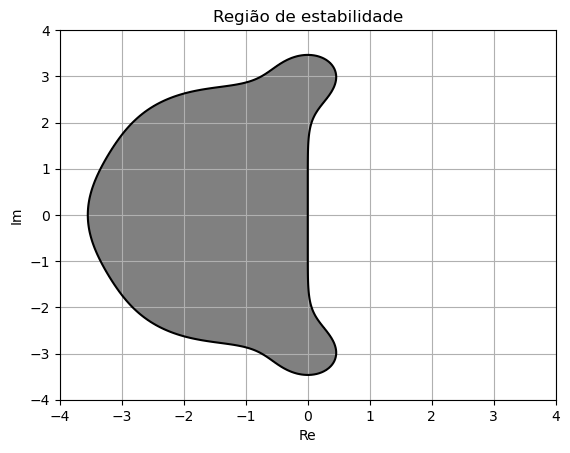

In [ ]:
pontos = 200
x,y = np.linspace(-4,4,pontos),np.linspace(-4,4,pontos)
X,Y =np.meshgrid(x,y)
Z = X + 1j*Y
plt.contour(X,Y,r_vec(Z),levels=[1],colors='black')
plt.contourf(X,Y,r_vec(Z),levels=[0,1],colors=['grey'])
plt.grid()
plt.title('Região de estabilidade')
plt.xlabel('Re')
plt.ylabel('Im')

In [ ]:
r(pontos)

array([[2.29024242e+09]])